In [1]:
# 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 시간 관리를 위한 라이브러리
import datetime

# 데이터 수집
from pandas_datareader import data
import requests
from bs4 import BeautifulSoup
import re
import time
import os
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select

# 화면 청소
from IPython.display import clear_output

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 분류 알고리즘
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 회귀 알고리즘
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 분류용 평가 함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용 평가 함수
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 차원 축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 형태소 분석도구
from soynlp.utils import DoublespaceLineCorpus
from soynlp.noun import LRNounExtractor_v2
from soynlp.noun import LRNounExtractor
from soynlp.noun import NewsNounExtractor

# 워드 클라우드
from collections import Counter
import pytagcloud
from IPython.display import Image

pygame 2.1.2 (SDL 2.0.18, Python 3.8.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
KRvideo = pd.read_csv("data/KR_youtube_trending_data.csv")

KRvideo

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09T09:32:48Z,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12T00:00:00Z,보겸|bokyem,5947503,53326,105756,139946,https://i.ytimg.com/vi/uq5LClQN3cE/default.jpg,False,False,NaN
1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12T09:00:08Z,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,1,2020-08-12T00:00:00Z,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,494,3339,https://i.ytimg.com/vi/I-ZbZCHsHD0/default.jpg,False,False,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁..."
2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10T09:54:13Z,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,22,2020-08-12T00:00:00Z,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,68898,50688,https://i.ytimg.com/vi/9d7jNUjBoss/default.jpg,False,False,NaN
3,3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,2020-08-11T15:00:58Z,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,24,2020-08-12T00:00:00Z,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...,1743374,36893,1798,8751,https://i.ytimg.com/vi/3pI_L3-sMVg/default.jpg,False,False,앞으로 좀 더 깔끔한 영상제작 약속 드리겠습니다.늘 감사드립니다
4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11T09:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353337,9763,23405,https://i.ytimg.com/vi/zrsBjYukE8s/default.jpg,False,False,MelOn http://kko.to/TWyXd7zYjSpotify https://s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119949,33hhNb4mBIc,"🚙 우리 지금 어디가?｜모닝루틴, 스킨케어, 비원츠 아이세럼스틱, 해방촌, OEAT",2022-04-01T09:00:01Z,UC2ukAHT9BdMuyD3iOyDrGDA,문세훈 (Moon Sehoon),22,2022-04-14T00:00:00Z,문세훈|sehoon|세훈|신지연|솔로지옥|지연|데이트|해방촌|이태원|스킨케어|남자스...,1371881,48319,0,3552,https://i.ytimg.com/vi/33hhNb4mBIc/default.jpg,False,False,"안녕하세요 문세훈입니다오늘은 비원츠와 함께하는 저의 스킨케어 루틴,그리고 커피를 한..."
119950,AeeBm4ulKj0,53만원🤑입생로랑🆚️46만원💸아르마니 어드벤트 캘린더 비교 언빡싱,2022-04-03T10:00:09Z,UCnekLiljel-Px4ClMC7b3mg,회사원A,26,2022-04-14T00:00:00Z,[None],337342,5622,0,211,https://i.ytimg.com/vi/AeeBm4ulKj0/default.jpg,False,False,"이 영상은 광고 계약사항 없는 오리지널 컨텐츠입니다.아르마니 뷰티 어드벤트캘린더, ..."
119951,6kaHgbQLbDo,구멍난 벽에 미로 만들기,2022-04-02T03:24:06Z,UCd4FmcWIVdWAy0-Q8OJBloQ,사나고 Sanago,26,2022-04-14T00:00:00Z,사나고|3D펜|3Dpen|만들기|making|3d프린터|3Dprinting,472724,13307,0,792,https://i.ytimg.com/vi/6kaHgbQLbDo/default.jpg,False,False,● 3D펜 사나고 샵https://smartstore.naver.com/sanago...
119952,VCeMOtwdDps,[4K] NMIXX(엔믹스) - “Kill This Love(by 블랙핑크)” Ba...,2022-04-01T08:00:10Z,UCB9e3pof1o83aa0kkaoeJGA,it's Live,24,2022-04-14T00:00:00Z,NMIXX|엔믹스|블랙핑크|BLACKPINK|Kill This Love|Kill T...,2602749,230222,0,12793,https://i.ytimg.com/vi/VCeMOtwdDps/default.jpg,False,False,JYP 신인 걸그룹 NMIXX(엔믹스)가 잇츠라이브에 떴다!!😋카리스마 넘치는 랩과...


In [3]:
# 데이터 프레임의 전체 정보 요약
KRvideo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119954 entries, 0 to 119953
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           119954 non-null  object
 1   title              119954 non-null  object
 2   publishedAt        119954 non-null  object
 3   channelId          119954 non-null  object
 4   channelTitle       119954 non-null  object
 5   categoryId         119954 non-null  int64 
 6   trending_date      119954 non-null  object
 7   tags               119954 non-null  object
 8   view_count         119954 non-null  int64 
 9   likes              119954 non-null  int64 
 10  dislikes           119954 non-null  int64 
 11  comment_count      119954 non-null  int64 
 12  thumbnail_link     119954 non-null  object
 13  comments_disabled  119954 non-null  bool  
 14  ratings_disabled   119954 non-null  bool  
 15  description        116558 non-null  object
dtypes: bool(2), int64(5)

In [4]:
df = KRvideo[["title", "channelTitle", "view_count", "categoryId"]]
df

,title,channelTitle,view_count,categoryId
0,안녕하세요 보겸입니다,보겸 BK,5947503,24
1,부락토스의 계획 [총몇명 프리퀄],총몇명,963384,1
2,평생 반성하면서 살겠습니다.,양팡 YangPang,2950885,22
3,안녕하세요 꽈뚜룹입니다.,꽈뚜룹 Quaddurup,1743374,24
4,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,JYP Entertainment,3433885,10
...,...,...,...,...
119949,"🚙 우리 지금 어디가?｜모닝루틴, 스킨케어, 비원츠 아이세럼스틱, 해방촌, OEAT",문세훈 (Moon Sehoon),1371881,22
119950,53만원🤑입생로랑🆚️46만원💸아르마니 어드벤트 캘린더 비교 언빡싱,회사원A,337342,26
119951,구멍난 벽에 미로 만들기,사나고 Sanago,472724,26
119952,[4K] NMIXX(엔믹스) - “Kill This Love(by 블랙핑크)” Ba...,it's Live,2602749,24


### 한글 정제

In [5]:
def text_cleaning(text) :
    # 한글 정규식 정의(띄어쓰기, ㄱ ~ ㅣ, 가 ~ 힣)
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]')
    # 정규식에 위배되는 것들일 길이가 0인 문자열로 변환한다.
    result = hangul.sub('', text)
    return result

In [6]:
# 한글 정제
df['title'] = df['title'].apply(lambda x : text_cleaning(x))

df

,title,channelTitle,view_count,categoryId
0,안녕하세요 보겸입니다,보겸 BK,5947503,24
1,부락토스의 계획 총몇명 프리퀄,총몇명,963384,1
2,평생 반성하면서 살겠습니다,양팡 YangPang,2950885,22
3,꽈뚜룹입니다,꽈뚜룹 Quaddurup,1743374,24
4,박진영 선미,JYP Entertainment,3433885,10
...,...,...,...,...
119949,우리 지금 어디가모닝루틴 스킨케어 비원츠 아이세럼스틱 해방촌,문세훈 (Moon Sehoon),1371881,22
119950,만원입생로랑만원아르마니 어드벤트 캘린더 비교 언빡싱,회사원A,337342,26
119951,구멍난 벽에 미로 만들기,사나고 Sanago,472724,26
119952,엔믹스 블랙핑크 초대형 루키의 블핑 커버 잇츠라이브,it's Live,2602749,24


In [7]:
noun_extractor = NewsNounExtractor()
nouns = noun_extractor.train_extract(df['title'].values)
nouns

used default noun predictor; Sejong corpus based logistic predictor
C:/Users/inkwabusan/.conda/envs/ds/lib/site-packages/soynlp
local variable 'f' referenced before assignment
local variable 'f' referenced before assignment
scan vocabulary ... 
done (Lset, Rset, Eojeol) = (80618, 43964, 41511)
predicting noun score was done                                        
before postprocessing 75849
_noun_scores_ 9117
checking hardrules ... done / 9117떡볶+(이)), NVsubE (사기(당)+했다) ... done
after postprocessing 6224
extracted 898 compounds from eojeolss ... 31000 / 31859

{'동네놈들': NewsNounScore(score=0, frequency=136, feature_proportion=0, eojeol_proportion=1.0, n_positive_feature=0, unique_positive_feature_proportion=0),
 '전기자동차': NewsNounScore(score=0, frequency=3, feature_proportion=0, eojeol_proportion=1.0, n_positive_feature=0, unique_positive_feature_proportion=0),
 '서울시장': NewsNounScore(score=0, frequency=3, feature_proportion=0, eojeol_proportion=1.0, n_positive_feature=0, unique_positive_feature_proportion=0),
 '먹방유튜버': NewsNounScore(score=0, frequency=36, feature_proportion=0, eojeol_proportion=1.0, n_positive_feature=0, unique_positive_feature_proportion=0),
 '부녀케미': NewsNounScore(score=0, frequency=5, feature_proportion=0, eojeol_proportion=1.0, n_positive_feature=0, unique_positive_feature_proportion=0),
 '대결ㄷㄷ': NewsNounScore(score=0, frequency=4, feature_proportion=0, eojeol_proportion=1.0, n_positive_feature=0, unique_positive_feature_proportion=0),
 '존리대표': NewsNounScore(score=0, frequency=5, feature_proportion=0, eojeol_proportion=1.0,

In [8]:
print(len(nouns))

7122


In [9]:
data_dict = {}

In [10]:
for key in nouns :
    
    # 빈도수가 20이상이고 확률이 1.0 이상인 것만 추출한다.
    if nouns[key].frequency >= 20 and nouns[key].score >= 1.0 :
        # 워드클라우드가 1글자가 있으면 문제가 생기때문에 2 글자 
        # 이상이 것만 담는다.
        if len(key) > 1 :
            data_dict[key] = nouns[key].frequency
            
data_dict

{'보겸': 45,
 '프리': 397,
 '비글부부': 28,
 '회복': 60,
 'ㅋㅋ': 1331,
 '충격적': 476,
 '풀버': 565,
 '불가': 43,
 '후기': 143,
 '강추': 33,
 '이병헌': 30,
 '화하이라이트': 89,
 '리얼': 526,
 '예언': 41,
 '기상천외': 24,
 '레알': 139,
 '공지': 44,
 'ㅎㄷㄷ': 60,
 '경이': 66,
 '기본': 56,
 '주차': 176,
 '특수': 162,
 '선배들': 35,
 '한일': 87,
 '여은파': 39,
 '강진': 31,
 '하차': 49,
 '변신': 57,
 '부모': 396,
 '별거': 60,
 '드림캐': 22,
 '테러': 46,
 '가요대': 114,
 '파란': 32,
 '제거': 32,
 '코미디빅리': 98,
 '중단': 26,
 '완전': 379,
 '클린버': 186,
 '스페셜': 461,
 '연고': 22,
 '호가될순': 21,
 '갑작': 28,
 '이송': 41,
 '과장': 27,
 '수도': 95,
 '슬기': 162,
 '선발': 91,
 '손절': 25,
 '블랙': 353,
 '사용기': 56,
 '탈영': 36,
 '진솔': 89,
 '친누나': 28,
 '붕괴': 75,
 '냉동': 106,
 '소름': 449,
 '출격': 51,
 '포르투갈': 32,
 '오르테가': 33,
 '추신수': 41,
 '지급': 26,
 '분석': 294,
 '강철': 256,
 '군만두': 23,
 '청탁': 21,
 '에어태': 22,
 '전반': 37,
 '제이': 38,
 '전복': 64,
 '충돌': 35,
 '타임': 99,
 '두번째': 67,
 '대체': 224,
 '리버풀': 127,
 '개막': 113,
 '캐스팅': 90,
 '프리미어리': 57,
 '쫀득': 69,
 '양보': 21,
 '돌진': 20,
 '순삭': 48,
 '단속': 55,
 '프로미스나인': 61,
 '등극': 37,


In [11]:
# 워드 클라우드를 위한 객체로 생성한다.
counter1 = Counter(data_dict)
counter1

Counter({'보겸': 45,
         '프리': 397,
         '비글부부': 28,
         '회복': 60,
         'ㅋㅋ': 1331,
         '충격적': 476,
         '풀버': 565,
         '불가': 43,
         '후기': 143,
         '강추': 33,
         '이병헌': 30,
         '화하이라이트': 89,
         '리얼': 526,
         '예언': 41,
         '기상천외': 24,
         '레알': 139,
         '공지': 44,
         'ㅎㄷㄷ': 60,
         '경이': 66,
         '기본': 56,
         '주차': 176,
         '특수': 162,
         '선배들': 35,
         '한일': 87,
         '여은파': 39,
         '강진': 31,
         '하차': 49,
         '변신': 57,
         '부모': 396,
         '별거': 60,
         '드림캐': 22,
         '테러': 46,
         '가요대': 114,
         '파란': 32,
         '제거': 32,
         '코미디빅리': 98,
         '중단': 26,
         '완전': 379,
         '클린버': 186,
         '스페셜': 461,
         '연고': 22,
         '호가될순': 21,
         '갑작': 28,
         '이송': 41,
         '과장': 27,
         '수도': 95,
         '슬기': 162,
         '선발': 91,
         '손절': 25,
         '블랙': 353,
         '사

In [12]:
# 가장 빈도수가 높은 단어 70개를 추출한다.
cloud_data = counter1.most_common(100)
cloud_data

[('ㅋㅋ', 1331),
 ('풀버', 565),
 ('리얼', 526),
 ('롤린', 481),
 ('충격적', 476),
 ('스페셜', 461),
 ('소름', 449),
 ('엠뚜루마뚜', 401),
 ('프리', 397),
 ('부모', 396),
 ('완전', 379),
 ('국제', 355),
 ('블랙', 353),
 ('언박싱', 321),
 ('분석', 294),
 ('스포츠머', 286),
 ('강철', 256),
 ('비디오머', 235),
 ('대체', 224),
 ('실종', 187),
 ('클린버', 186),
 ('주차', 176),
 ('특수', 162),
 ('슬기', 162),
 ('살고', 158),
 ('신혼', 149),
 ('회풀버', 144),
 ('후기', 143),
 ('레알', 139),
 ('디스', 130),
 ('리버풀', 127),
 ('별빛', 123),
 ('맛이', 119),
 ('가요대', 114),
 ('개막', 113),
 ('마이보', 113),
 ('참치', 113),
 ('금쪽', 110),
 ('냉동', 106),
 ('청하', 100),
 ('타임', 99),
 ('코미디빅리', 98),
 ('수도', 95),
 ('선발', 91),
 ('캐스팅', 90),
 ('화하이라이트', 89),
 ('진솔', 89),
 ('한일', 87),
 ('박종', 83),
 ('취미', 80),
 ('붕괴', 75),
 ('중대', 75),
 ('환상적', 74),
 ('구라', 72),
 ('영입', 71),
 ('어서와한국은처음', 70),
 ('가나', 70),
 ('강호', 70),
 ('쫀득', 69),
 ('넣지', 69),
 ('야전삽', 69),
 ('람보르기니', 69),
 ('출동', 69),
 ('두번째', 67),
 ('경이', 66),
 ('감정', 66),
 ('볶지', 66),
 ('전복', 64),
 ('졸업', 62),
 ('당근', 62),
 ('프로미스나인', 61

In [13]:
#cloud_data = pytagcloud.make_tags(cloud_data)

cloud_data = pytagcloud.make_tags(cloud_data, maxsize=196)

pytagcloud.create_tag_image(cloud_data, 'youtube_keyword.jpg',
                           size=(900, 600), fontname='DH Regular',
                           rectangular=False)

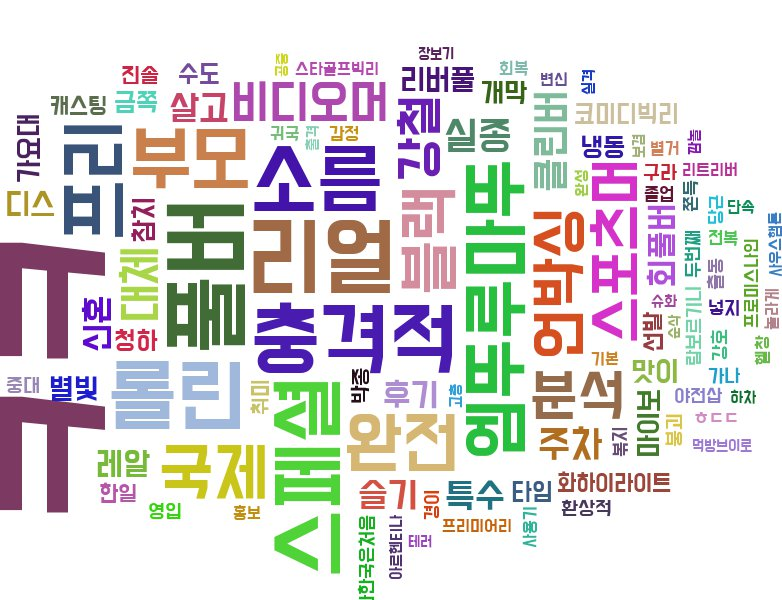

In [14]:
Image(filename='youtube_keyword.jpg')